<a href="https://colab.research.google.com/github/Rishabh-Thapliyal/Google-colab/blob/main/BlockCHain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('sample-orders.csv',  encoding='unicode_escape')

In [ ]:
df.head()

,order_date,order_id,customer,grand_total
0,9/7/2011,CA-2011-100006,Dennis Kane,378
1,7/8/2011,CA-2011-100090,Ed Braxton,699
2,3/14/2011,CA-2011-100293,Neil Franzsisch,91
3,1/29/2011,CA-2011-100328,Jasper Cacioppo,4
4,4/8/2011,CA-2011-100363,Jim Mitchum,21


In [ ]:
df.shape

(5009, 4)

In [ ]:
df.tail()

,order_date,order_id,customer,grand_total
5004,11/4/2014,US-2014-168802,Jack O'Briant,18
5005,7/24/2014,US-2014-169320,Lena Hernandez,171
5006,9/8/2014,US-2014-169488,Allen Armold,57
5007,8/29/2014,US-2014-169502,Matthew Grinstein,113
5008,7/8/2014,US-2014-169551,Rob Lucas,1345


In [ ]:
df.describe()

,grand_total
count,5009.000000
mean,458.626672
std,954.729307
min,1.000000
25%,38.000000
50%,152.000000
75%,512.000000
max,23661.000000


In [ ]:
df['customer'].value_counts(ascending=False)

Emily Phan             17
Chloris Kastensmidt    13
Sally Hughsby          13
Joel Eaton             13
Noel Staavos           13
                       ..
Susan MacKendrick       1
Carl Jackson            1
Anemone Ratner          1
Lela Donovan            1
Jenna Caffey            1
Name: customer, Length: 793, dtype: int64

In [ ]:
df['customer'].nunique()

793

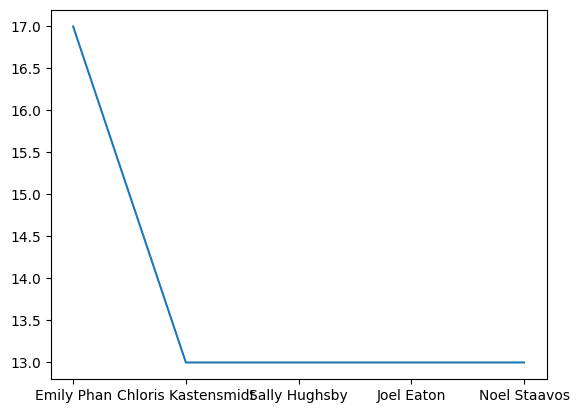

In [ ]:
plt.plot(df['customer'].value_counts(ascending=False)[:5], )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_date   5009 non-null   object
 1   order_id     5009 non-null   object
 2   customer     5009 non-null   object
 3   grand_total  5009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 156.7+ KB


In [ ]:
df['order_date'].value_counts()

9/6/2013      19
9/5/2014      16
12/3/2014     16
11/4/2014     16
11/20/2014    15
              ..
11/16/2014     1
3/6/2012       1
1/19/2012      1
5/11/2012      1
1/14/2014      1
Name: order_date, Length: 1238, dtype: int64

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [ ]:
df.sort_values(['order_date'],)

,order_date,order_id,customer,grand_total
56,2011-01-04,CA-2011-103800,Darren Powers,16
161,2011-01-05,CA-2011-112326,Phillina Ober,288
511,2011-01-06,CA-2011-141817,Mick Brown,20
776,2011-01-07,CA-2011-167199,Maria Etezadi,4375
83,2011-01-07,CA-2011-106054,Jack O'Briant,13
...,...,...,...,...
4965,2014-12-30,US-2014-158526,Katherine Hughes,1815
3328,2014-12-31,CA-2014-126221,Chuck Clark,209
3097,2014-12-31,CA-2014-115427,Erica Bern,35
3663,2014-12-31,CA-2014-143259,Patrick O'Donnell,467


In [ ]:
Now = df['order_date'].max()

In [ ]:
Now

Timestamp('2014-12-31 00:00:00')

In [ ]:
df[df['customer']=='Aaron Bergman']

,order_date,order_id,customer,grand_total
624,2011-02-19,CA-2011-152905,Aaron Bergman,13
665,2011-03-07,CA-2011-156587,Aaron Bergman,310
2336,2013-11-11,CA-2013-140935,Aaron Bergman,564


In [ ]:
df.groupby('customer').agg({'order_date': lambda x: (Now - x.max()).days, # Recency
                                        'order_id': lambda x: len(x)})

,order_date,order_id
customer,,
Aaron Bergman,415,3
Aaron Hawkins,12,7
Aaron Smayling,88,7
Adam Bellavance,54,8
Adam Hart,34,10
...,...,...
Xylona Preis,43,11
Yana Sorensen,9,8
Yoseph Carroll,4,5


In [ ]:
rfmTable = df.groupby('customer').agg({'order_date': lambda x: (Now - x.max()).days, # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'grand_total': lambda x: x.sum()}) # Monetary Value

rfmTable['order_date'] = rfmTable['order_date'].astype(int)
rfmTable.rename(columns={'order_date': 'recency',
                         'order_id': 'frequency',
                         'grand_total': 'monetary_value'}, inplace=True)

In [ ]:
rfmTable.head()

,recency,frequency,monetary_value
customer,,,
Aaron Bergman,415,3,887
Aaron Hawkins,12,7,1744
Aaron Smayling,88,7,3050
Adam Bellavance,54,8,7756
Adam Hart,34,10,3249


In [ ]:
rfmTable['monetary_value'].max()

25042

In [ ]:
rfmTable[rfmTable['monetary_value']==25042]

,recency,frequency,monetary_value
customer,,,
Sean Miller,79,5,25042


In [ ]:
df[df['customer']=='Sean Miller']

,order_date,order_id,customer,grand_total
545,2011-03-18,CA-2011-145317,Sean Miller,23661
1397,2012-12-25,CA-2012-144890,Sean Miller,10
3706,2014-07-10,CA-2014-145128,Sean Miller,526
3789,2014-10-13,CA-2014-149146,Sean Miller,8
4416,2012-08-21,US-2012-130512,Sean Miller,837


In [ ]:
quantiles = rfmTable.quantile([0.25,0.5,0.75,0.9])

In [ ]:
def RClass(x,p,d):
  print(x,p,d)
  if x<=d[p][0.25]:
    return 1
  elif x<=d[p][0.50]:
    return 2
  elif x<= d[p][0.75]:
    return 3
  else:
    return 4

### x=cvalues,p = recency,monetary value
def FMClass(x,p,d):
  if x<=d[p][0.25]:
    return 4
  elif x<=d[p][0.50]:
    return 3
  elif x<= d[p][0.75]:
    return 2
  else:
    return 1

In [ ]:
rfmSegmentation = rfmTable

In [ ]:
quantiles

,recency,frequency,monetary_value
0.25,30.0,5.0,1145.0
0.50,75.0,6.0,2257.0
0.75,183.0,8.0,3784.0
0.90,405.8,10.0,6038.6


In [ ]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

rfmSegmentation.head()

rfmSegmentation.to_csv('rfm_table.csv', sep=',')


In [ ]:
rfmSegmentation.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer,,,,,,,
Aaron Bergman,415,3,887,4,4,4,444
Aaron Hawkins,12,7,1744,1,2,3,123
Aaron Smayling,88,7,3050,3,2,2,322
Adam Bellavance,54,8,7756,2,2,1,221
Adam Hart,34,10,3249,2,1,2,212


Customer Acquisation Cost: CAC

In [ ]:
data = pd.read_csv('bank_marketing.csv')

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.shape

(41188, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000
